In [48]:
import numpy as np
import math
from collections import Counter
from typing import NamedTuple
from pprint import pprint
import sklearn.metrics
import scipy.stats
import matplotlib.pyplot as plt
import autograd.numpy as anp
import autograd


rng = np.random.default_rng()


Instructions: https://work.caltech.edu/homework/hw5.pdf

Answers: http://work.caltech.edu/homework/hw5_sol.pdf

# Linear Regression Error

# 1.

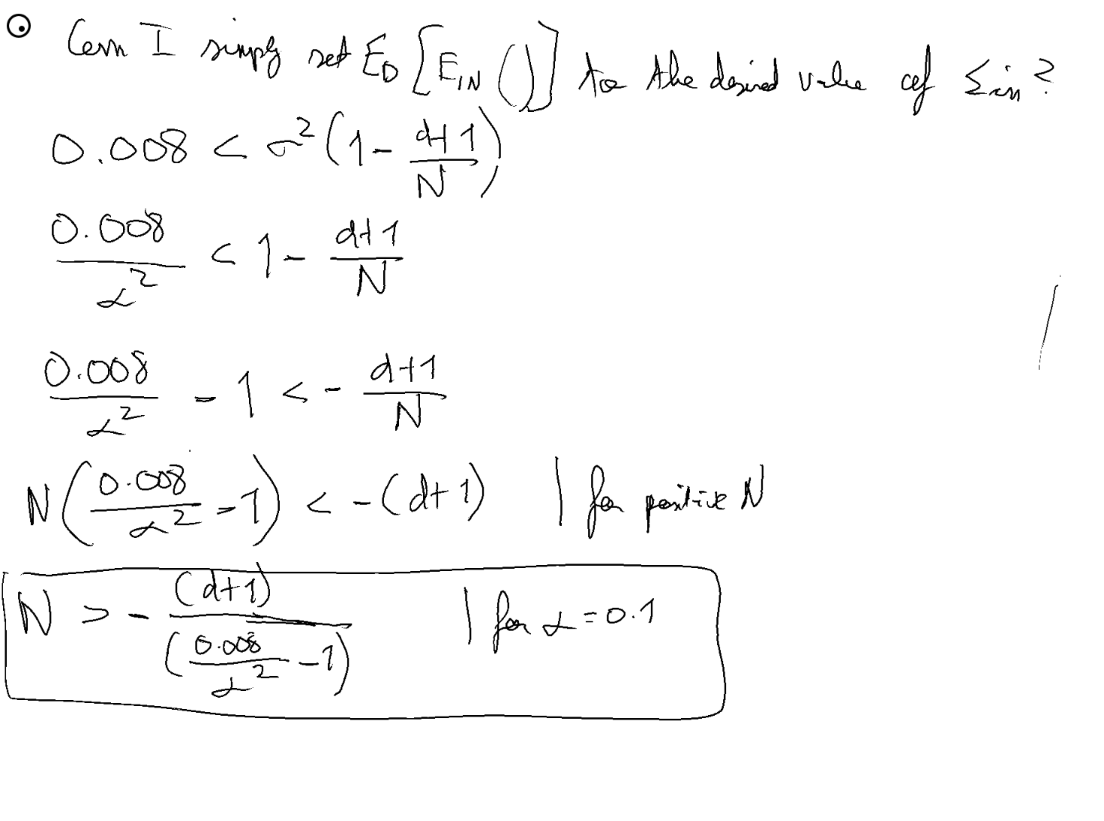

In [5]:
d = 8
σ = 0.1

-( (d+1) / ((0.008)/(σ**2) - 1) )

44.99999999999996

So that smells a bit like a trap ;) but it would be <font color="green">[c]</font>.

Simple enough, I guess.

Oh I misread the equation in the question, it's only one expected value of E<sub>D</sub>, so yeah we're fine.

# Nonlinear Transforms

# 2.

From drawing out a few hyperbolae, you need positive `x` and negative `y` for this shape, so that only leaves

<font color="red">[e]</font> as the answer.

Wrongedydongedy.

In my last attempt from 4 years ago, I actually went and plotted all the classifiers, arriving at the correct solution. Pretty cool.

# 3.

Okay this has 15 parameters (or degrees of freedom, supposedly).

I think the order of the nonlinearity for each parameter shouldn't matter, but I'm not quite sure. It could of course be that some of these do not represent actual degrees of freedom, due to the limited input space X.

Assuming for a moment that's not the case, let's look at the question:

What is the smallest values that is >= the VC dimension of a linear model after this Phi, so we're looking for the lowest correct upper bound on the VC-Dimension.

For a linear model that would be d+1, so 16, hence 15 is not correct and I would say the answer must be

<font color="red">[d]</font>

Well yeah I guess the constant term does not count as a dimension, but why is it not a degree of freedom? 🤔

Ah of course that's where d+1 actually comes from ;)

So the correct answer must be 15:


<font color="green">[c]</font>

# Gradient Descent

# 4.

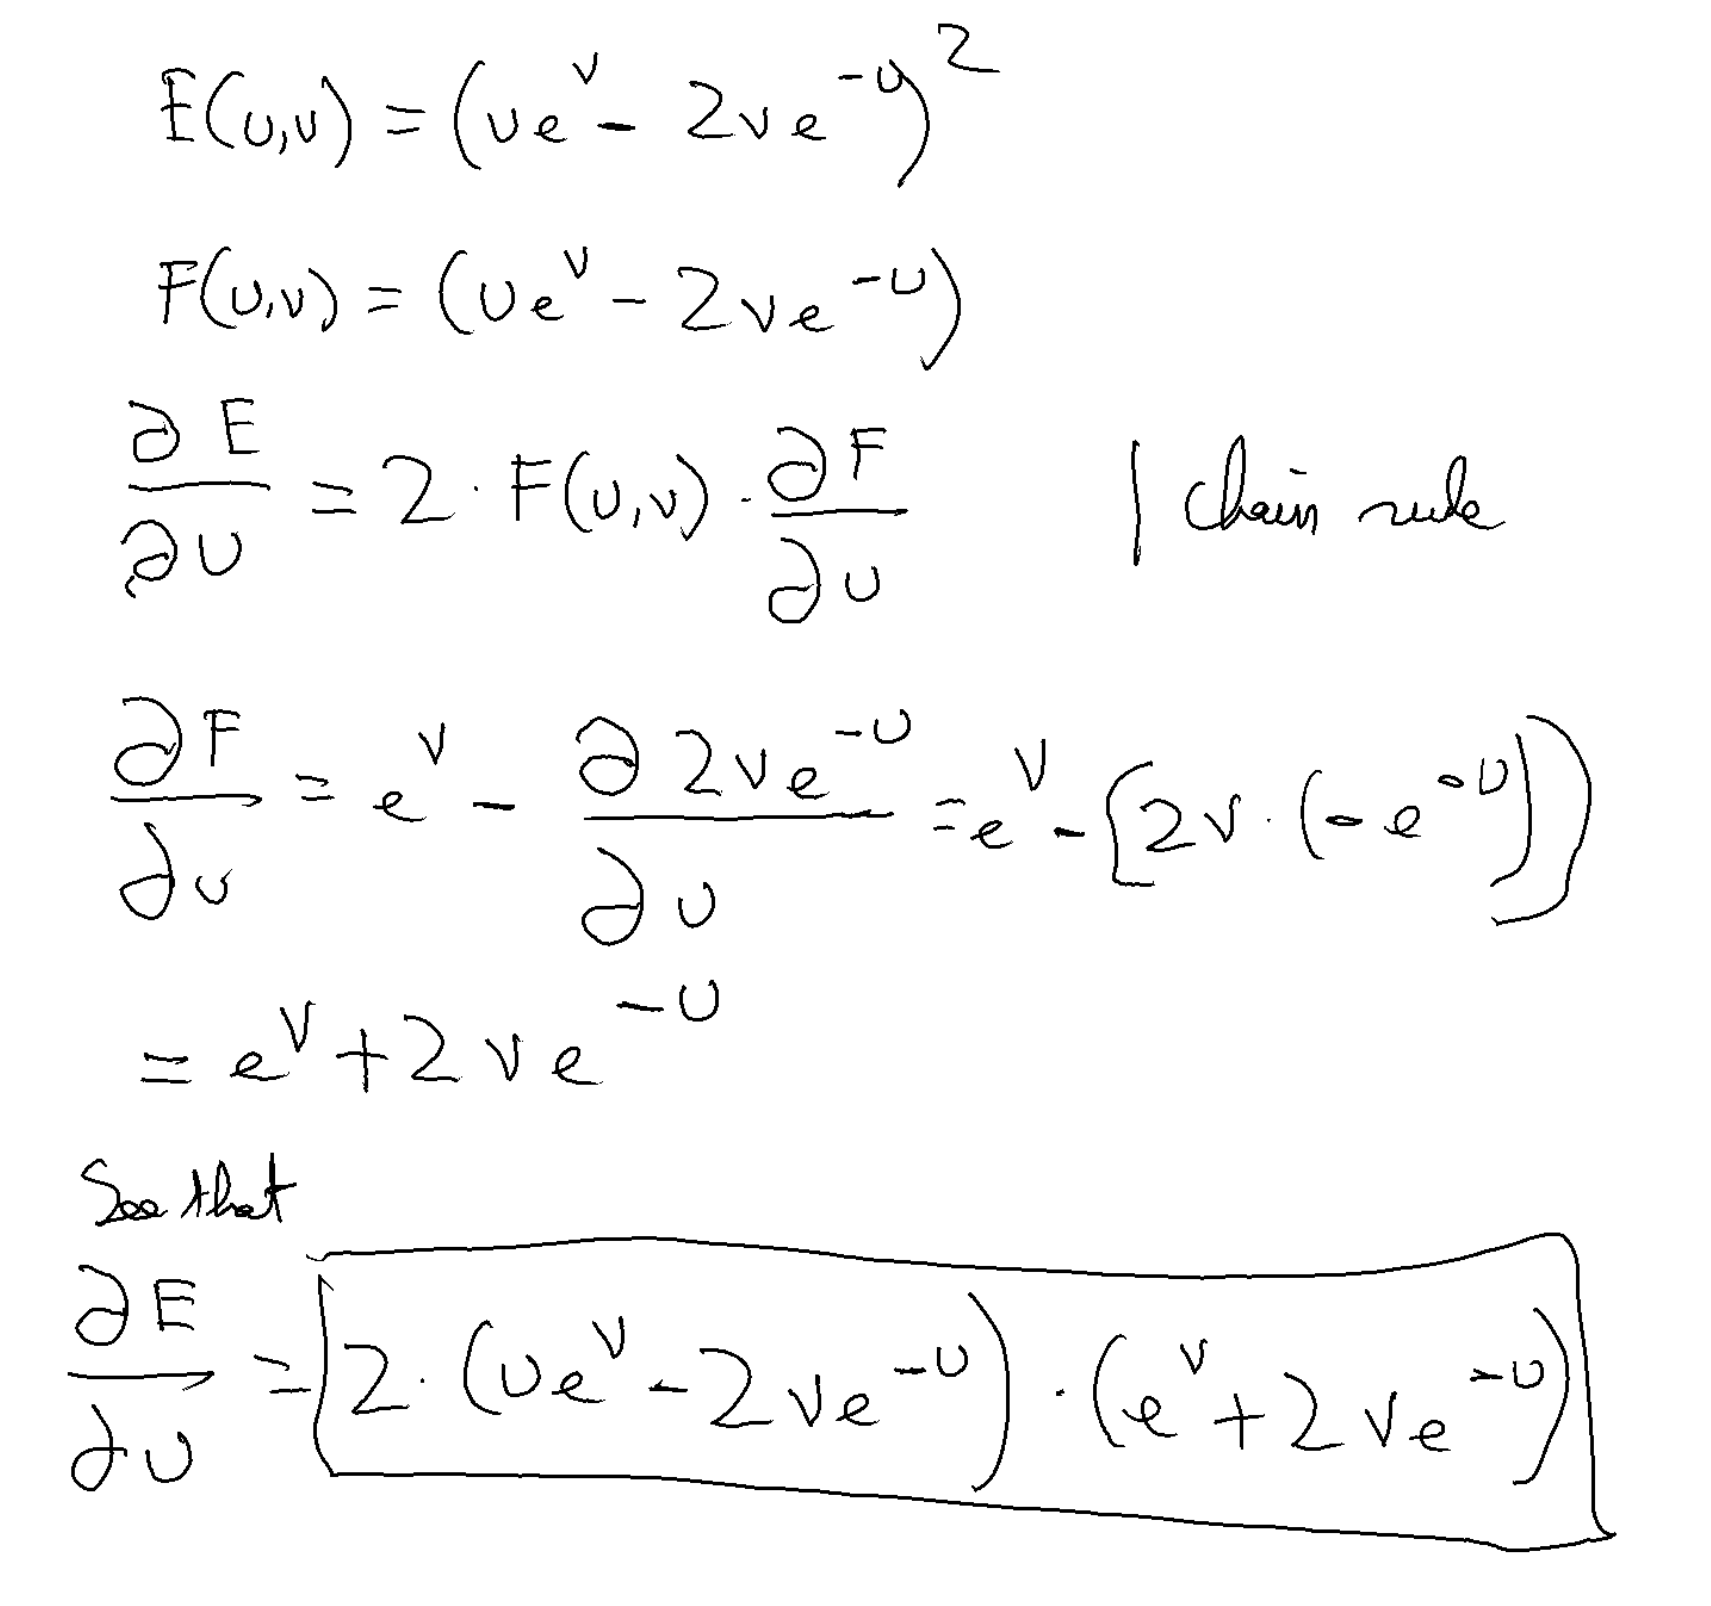

Answer: <font color="green">e</font>

# 5.

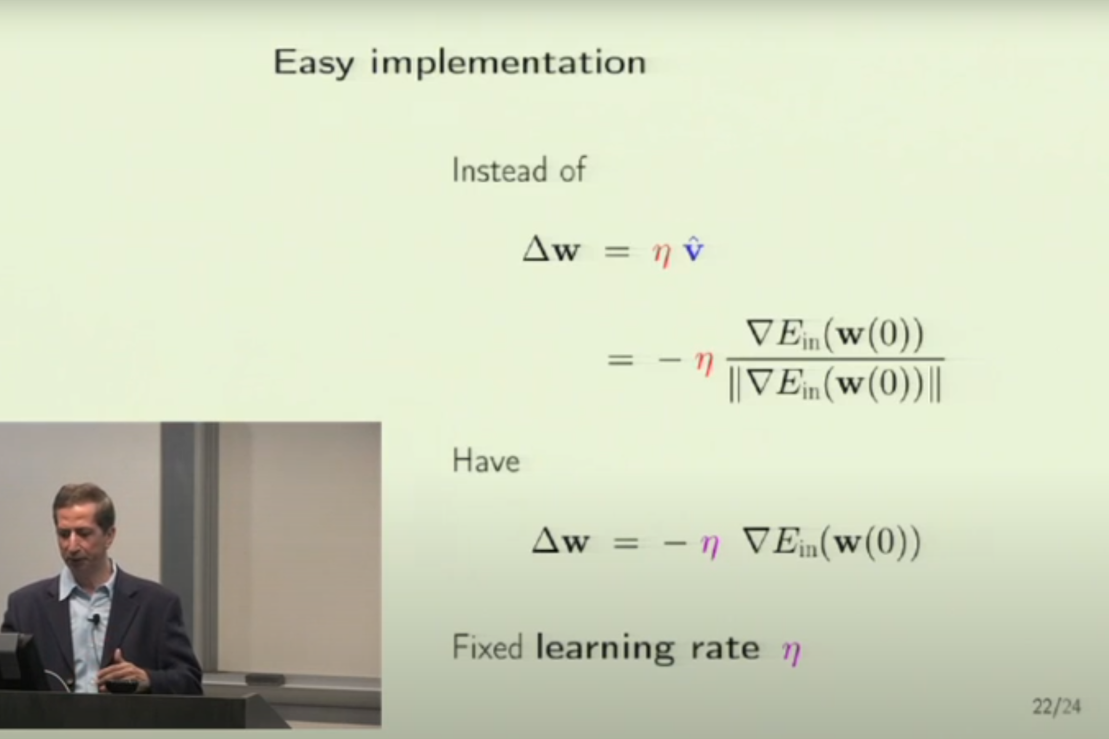

Start at (u,v) = (1,1)

η = 0.1

E(u, v) = (ue^v − 2ve^(−u))**2

Stopping condition: "Fall below 10^-14 for the first time."

We already have dE/du from the answer above, now I still need dE/dv for the v direction:

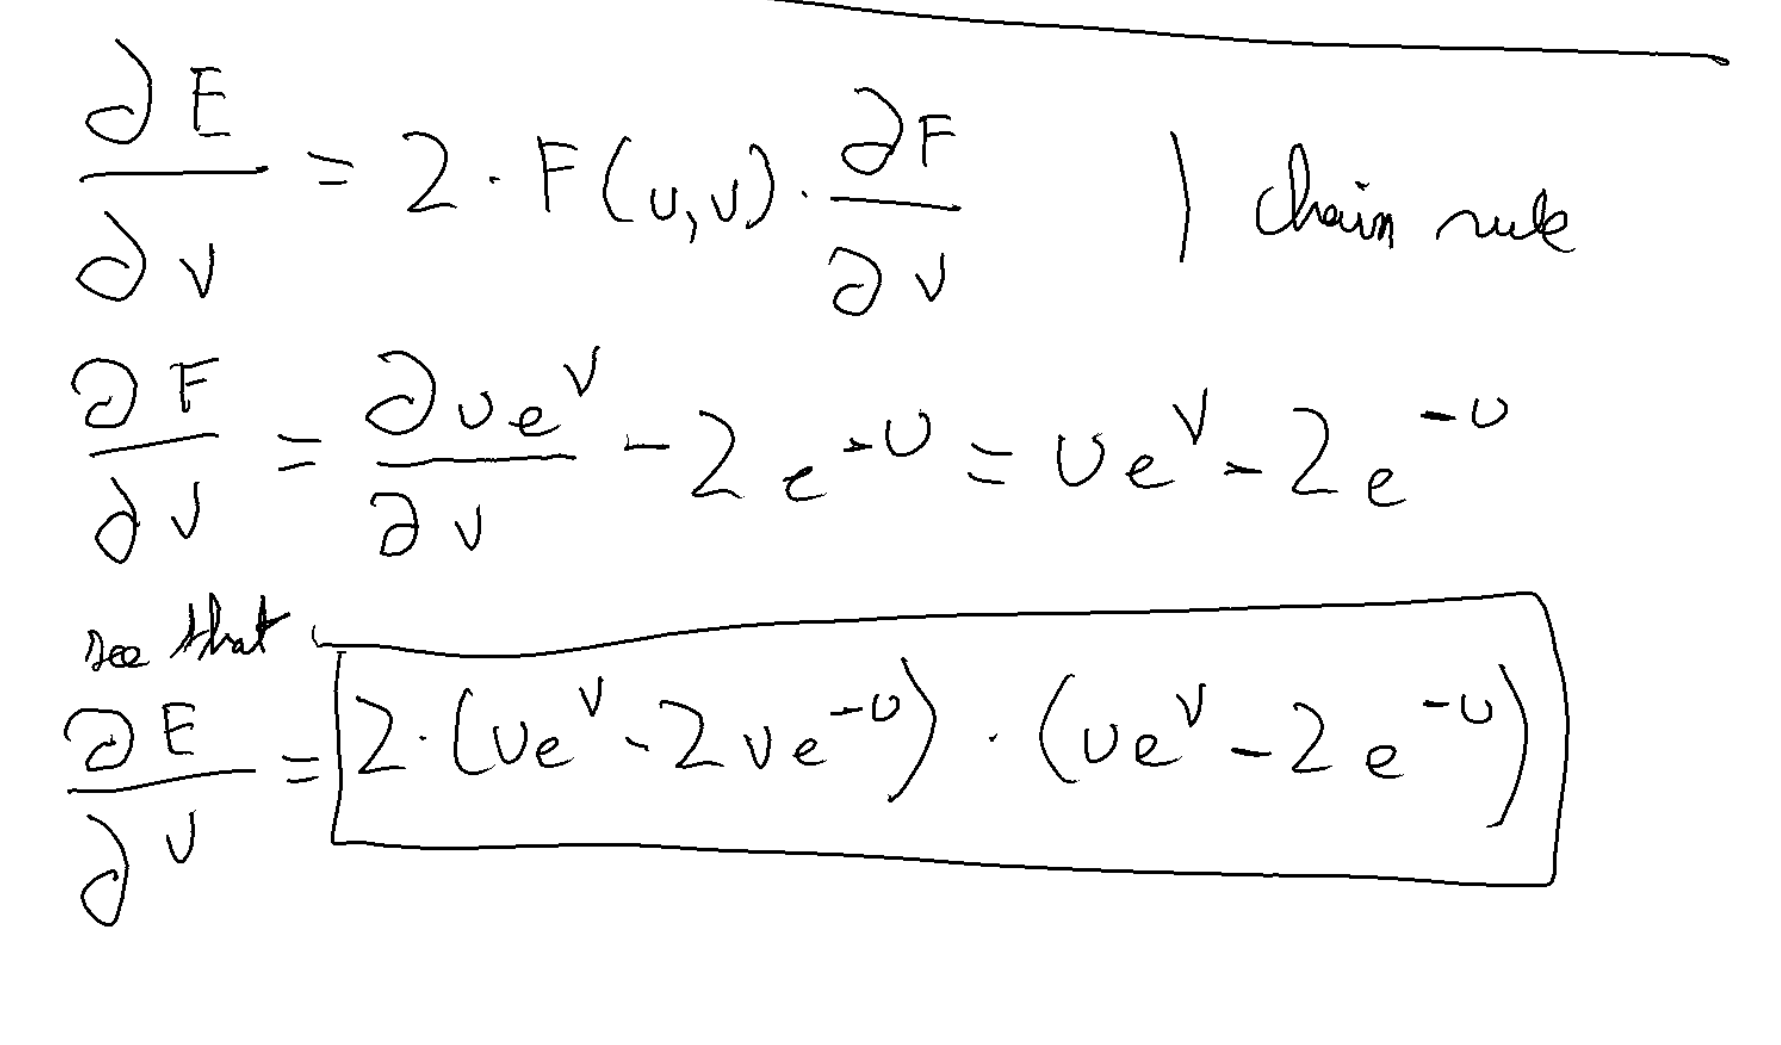

In [14]:
def gd(i, η, u, v, stop, verbose=False):
    if verbose:
        print(f"Iteration {i}")

    if i > 20:
        print("We probably don't need that many recursions")
        return
    
    e = (u * np.exp(v) - 2 * v * np.exp(-u))**2
    if verbose:
        print(f"e at iteration {i}: {e}")

    if e < stop:
        if verbose:
            print(f"Stopping condition reached")
        print(f"final error: {e} after {i} iteration")
    else:
        if verbose:
            print(f"error still too large at {e}")
        new_u = u - η * 2 * ( u*np.exp(v) - 2*v*np.exp(-u) ) * ( np.exp(v) + 2*v*np.exp(-u) )
        new_v = v - η * 2 * ( u*np.exp(v) - 2*v*np.exp(-u) ) * ( u*np.exp(v) - 2*np.exp(-u) )

        if verbose:
            print(f"New u: {new_u}")
            print(f"New v: {new_v}")
        
        gd(i+1, η, new_u, new_v, stop, verbose=verbose)

η = 0.1
u = 1.0
v = 1.0
stop = 10**(-14)
verbose = True

gd(0, η, u, v, stop, verbose)
        
    

Iteration 0
e at iteration 0: 3.9303972318771003
error still too large at 3.9303972318771003
New u: -0.3695429931968399
New v: 0.21392055362457985
Iteration 1
e at iteration 1: 1.1595097299694384
error still too large at 1.1595097299694384
New u: 0.030520690351262925
New v: -0.5079340454438062
Iteration 2
e at iteration 2: 1.0074074829627007
error still too large at 1.0074074829627007
New u: 0.1075231141989985
New v: -0.12221025557350335
Iteration 3
e at iteration 3: 0.09900912162725602
error still too large at 0.09900912162725602
New u: 0.06564482581488232
New v: -0.015166559876933133
Iteration 4
e at iteration 4: 0.008660645362812157
error still too large at 0.008660645362812157
New u: 0.04784117062171894
New v: 0.018489899226745148
Iteration 5
e at iteration 5: 0.0001817557917280175
error still too large at 0.0001817557917280175
New u: 0.044999463099433826
New v: 0.023499251696793292
Iteration 6
e at iteration 6: 1.297239847844203e-06
error still too large at 1.297239847844203e-06
N

My answer: <font color="green">[d]</font>

# 6.

My answer: <font color="green">[e]</font>

# 7.

In [17]:
def cd(i, η, u, v, stop, verbose=False):
    if verbose:
        print(f"Iteration {i}")

    if i > 20:
        print("Iteration 20 - something's off")
        return
    
    e = (u * np.exp(v) - 2 * v * np.exp(-u))**2
    if verbose:
        print(f"e at iteration {i}: {e}")

    if i == stop:
        if verbose:
            print(f"Stopping condition of {i} iterations reached")
        print(f"final error: {e} after {i} iterations")
    else:
        new_u = u - η * 2 * ( u*np.exp(v) - 2*v*np.exp(-u) ) * ( np.exp(v) + 2*v*np.exp(-u) )
        new_v = v - η * 2 * ( new_u*np.exp(v) - 2*v*np.exp(-new_u) ) * ( new_u*np.exp(v) - 2*np.exp(-new_u) )

        if verbose:
            print(f"New u: {new_u}")
            print(f"New v: {new_v}")
        
        cd(i+1, η, new_u, new_v, stop, verbose=verbose)

η = 0.1
u = 1.0
v = 1.0
stop = 15
verbose = True

cd(0, η, u, v, stop, verbose)

Iteration 0
e at iteration 0: 3.9303972318771003
New u: -0.3695429931968399
New v: -2.0399228804668
Iteration 1
e at iteration 1: 34.290163112349845
New u: 6.392473764796078
New v: -2.178698890074495
Iteration 2
e at iteration 2: 0.5341425913722004
New u: 6.3769952344357295
New v: -2.2834726206287224
Iteration 3
e at iteration 3: 0.432660827324194
New u: 6.364607486372252
New v: -2.3682137938688013
Iteration 4
e at iteration 4: 0.3650397350187307
New u: 6.354276586243667
New v: -2.4395948141618047
Iteration 5
e at iteration 5: 0.31646807535966437
New u: 6.345420864765152
New v: -2.501375275741075
Iteration 6
e at iteration 6: 0.2797634230640927
New u: 6.337678061699896
New v: -2.555899568612143
Iteration 7
e at iteration 7: 0.25098631167528807
New u: 6.330806281241957
New v: -2.6047348478027588
Iteration 8
e at iteration 8: 0.22778329894427699
New u: 6.324635534221026
New v: -2.6489835126940253
Iteration 9
e at iteration 9: 0.20865669572438011
New u: 6.319041586427719
New v: -2.6894519

The answer is <font color="green">[a]</font> so much less effective than GD.

# Logistic Regression

Error function is cross-entropy error:
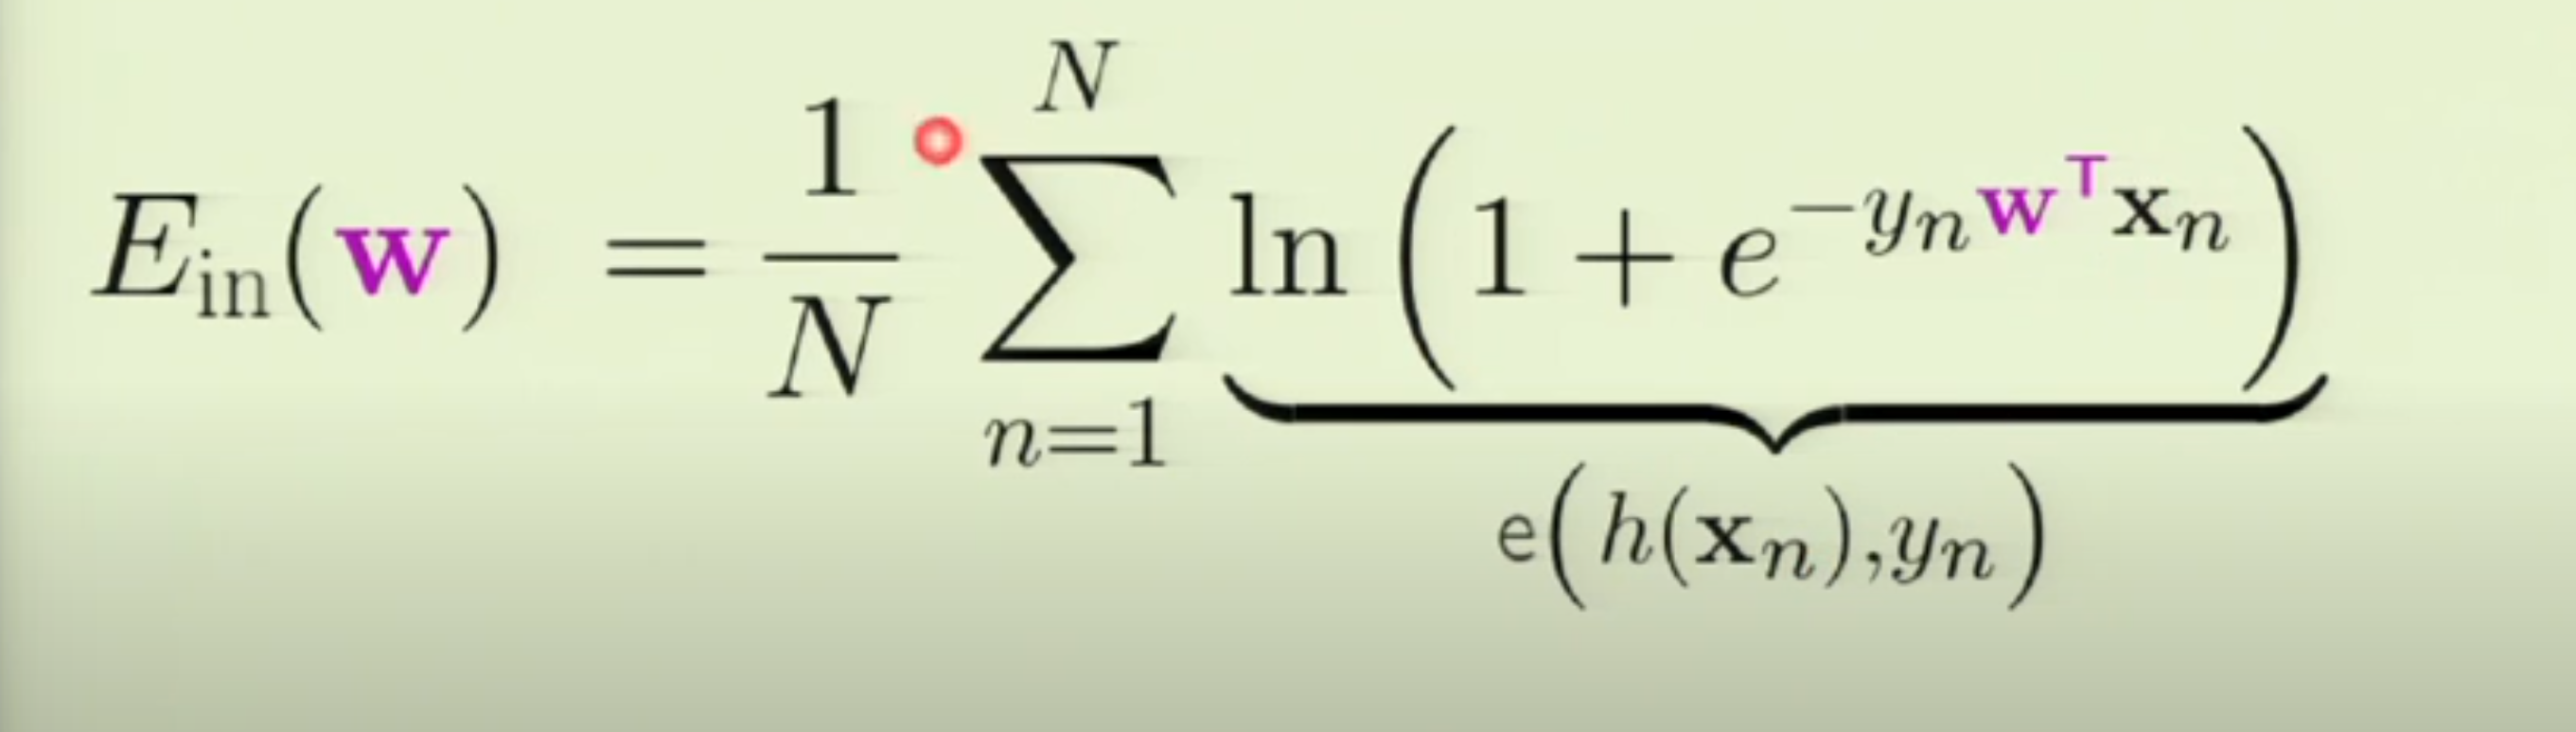

In [43]:
def x_entropy_error(x, y, w):
    assert type(w) == np.ndarray
    assert w.shape[0] == 3

    assert type(x) == np.ndarray
    assert type(y) == np.ndarray
    assert len(x) == len(y)

    return np.array([np.log( 1 + np.exp( -y_n * w.dot(x_n) ) ) for (x_n, y_n) in zip(x, y)]).mean()

x = np.array([[1, 2, 3], [1, 5, 6]])
y = np.array([-1, 1])
w = np.array([1, 0.5, -0.2])

x_entropy_error(x, y, w)


0.857981437258207

Let's check if my impl is correct:

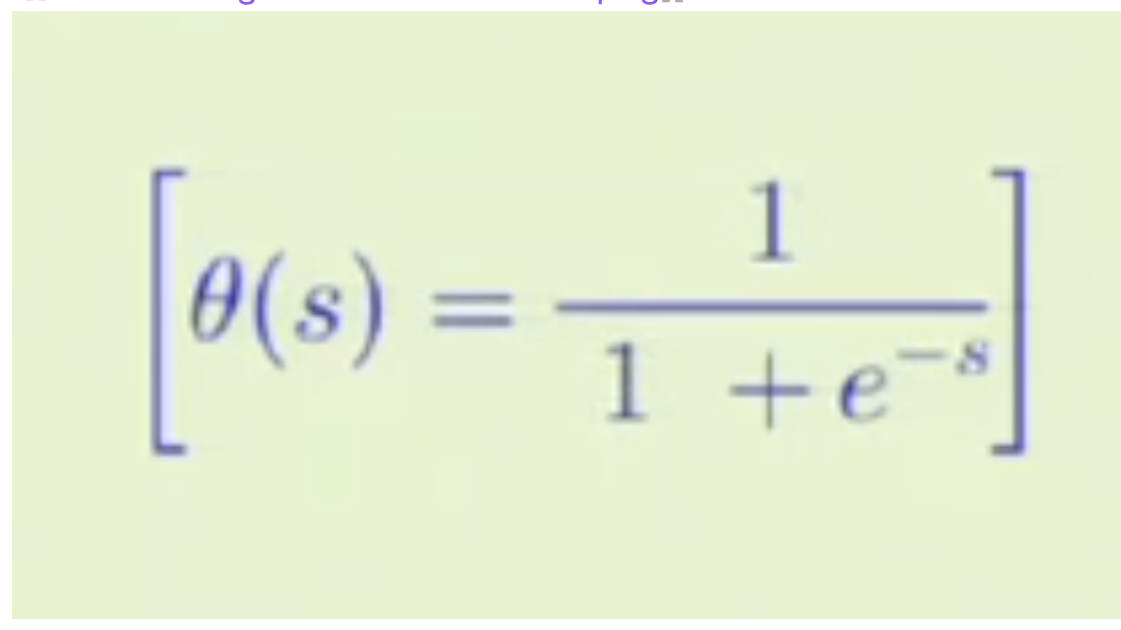

In [46]:
y_pred = x.dot(w)
# Pass linear predictions through the sigmoid:
y_pred = 1 / (1+np.exp(-y_pred))
sklearn.metrics.log_loss(y, y_pred)

0.8579814372582069

🎉

Let's try a version with full GD before I arrive at the definition of SGD...

Redefining x_entropy_order for use with autograd:

In [60]:
def x_entropy_error(x, y, w):
    assert w.shape[0] == 3

    assert len(x) == len(y)

    return anp.array([anp.log( 1 + anp.exp( -y_n * anp.dot(w, x_n) ) ) for (x_n, y_n) in zip(x, y)]).mean()

In [78]:
from typing import NamedTuple
from pprint import pprint


class Point(NamedTuple):
    x: float
    y: float

def run_log_regression(n_training, n_testing_points, n_experiments, η, stopping_condition, verbose=False): 

    n_epochs_taken = np.array([])
    eouts = np.array([])
    
    for experiment in range(n_experiments):
        # Pick a new target function f
        p1 = Point(*np.random.uniform(-1, 1, size=2))
        p2 = Point(*np.random.uniform(-1, 1, size=2))
        m = (p2.y - p1.y) / (p2.x - p1.x)
        b = p1.y - m * p1.x
        
        def classify_point(x, y):
            fxy = y - m * x - b
            return 1 if fxy > 0 else -1
    
        # Pick N random training points, augmented with constant x_0
        x_train = np.c_[ np.ones(n_training), 
                 np.random.uniform(-1, 1, size=(n_training, 2)) ]
        assert x_train.shape == (n_training, 3)
        y_train = np.array([classify_point(p[1], p[2]) for p in x_train])
    
        # Initialize weights (+integrated bias) at zero
        w = np.zeros(3)
        new_w = np.zeros(3)

        # Run logistic regression for n epochs
        for epoch in range(2_000):
            # TODO: replace here with SGD
            e = x_entropy_error(x_train, y_train, w)
            if verbose:
                print(f"X Entropy error in epoch {epoch} of experiment {experiment}: {e}")
            de_dw = autograd.grad(x_entropy_error, argnum=2) # Partial derivative of x-entropy-error with respect to w 
            new_w = w - η * de_dw(x_train, y_train, w)

            # Stopping Condition
            if verbose:
                print(f"old weights: {w}")
                print(f"new weights: {new_w}")
            if np.linalg.norm(w - new_w) < stopping_condition:
                if verbose:
                    print(f"Stopping condition reached for experiment {experiment}.")
                break
                
            w = new_w
            if verbose:
                print(f"Updated weights in epoch {epoch} to: {new_w}")

        # Estimate E_out
        x_test = np.c_[ np.ones(n_testing_points), 
                 np.random.uniform(-1, 1, size=(n_testing_points, 2)) ]
        y_true_test = np.array([classify_point(p[1], p[2]) for p in x_test])
        e_out = x_entropy_error(x_test, y_true_test, new_w)
        if verbose:
            print(f"estimated e_out for experiment {experiment}: {e_out}")
        eouts = np.append(eouts, e_out)

    e_out = eouts.mean()
    print(f"Estimated e_out after {n_experiments} experiments: {e_out}")
        

n_training = 100
n_testing_points = 10_000
# n_experiments = 100
n_experiments = 10
η = 0.01
stopping_condition = 0.001
verbose = False

run_log_regression(n_training=n_training, n_testing_points=n_testing_points, n_experiments=n_experiments, η=η, stopping_condition=stopping_condition, verbose=verbose)


Estimated e_out after 10 experiments: 0.3400727265349136


As expected, this is taking a loooong time to run -.-

Interesting that "batch" GD doesn't work well here at all, with a stopping rate of 0.01 it seems like all the gradients almost cancel each other out, and it converges immediately but to a really bad solution.

Presumably using SGD cancels that out, and having the many more steps should prove amazing.

Interestingly, batch GD doesn't work well here and would need either a much larger η, or many more iterations.

Let's try with a larger η:



In [79]:
from typing import NamedTuple
from pprint import pprint


class Point(NamedTuple):
    x: float
    y: float

def run_log_regression(n_training, n_testing_points, n_experiments, η, stopping_condition, verbose=False): 

    n_epochs_taken = np.array([])
    eouts = np.array([])
    
    for experiment in range(n_experiments):
        # Pick a new target function f
        p1 = Point(*np.random.uniform(-1, 1, size=2))
        p2 = Point(*np.random.uniform(-1, 1, size=2))
        m = (p2.y - p1.y) / (p2.x - p1.x)
        b = p1.y - m * p1.x
        
        def classify_point(x, y):
            fxy = y - m * x - b
            return 1 if fxy > 0 else -1
    
        # Pick N random training points, augmented with constant x_0
        x_train = np.c_[ np.ones(n_training), 
                 np.random.uniform(-1, 1, size=(n_training, 2)) ]
        assert x_train.shape == (n_training, 3)
        y_train = np.array([classify_point(p[1], p[2]) for p in x_train])
    
        # Initialize weights (+integrated bias) at zero
        w = np.zeros(3)
        new_w = np.zeros(3)

        # Run logistic regression for n epochs
        for epoch in range(2_000):
            # TODO: replace here with SGD
            e = x_entropy_error(x_train, y_train, w)
            if verbose:
                print(f"X Entropy error in epoch {epoch} of experiment {experiment}: {e}")
            de_dw = autograd.grad(x_entropy_error, argnum=2) # Partial derivative of x-entropy-error with respect to w 
            new_w = w - η * de_dw(x_train, y_train, w)

            # Stopping Condition
            if verbose:
                print(f"old weights: {w}")
                print(f"new weights: {new_w}")
            if np.linalg.norm(w - new_w) < stopping_condition:
                if verbose:
                    print(f"Stopping condition reached for experiment {experiment}.")
                break
                
            w = new_w
            if verbose:
                print(f"Updated weights in epoch {epoch} to: {new_w}")

        # Estimate E_out
        x_test = np.c_[ np.ones(n_testing_points), 
                 np.random.uniform(-1, 1, size=(n_testing_points, 2)) ]
        y_true_test = np.array([classify_point(p[1], p[2]) for p in x_test])
        e_out = x_entropy_error(x_test, y_true_test, new_w)
        if verbose:
            print(f"estimated e_out for experiment {experiment}: {e_out}")
        eouts = np.append(eouts, e_out)

    e_out = eouts.mean()
    print(f"Estimated e_out after {n_experiments} experiments: {e_out}")
        

n_training = 100
n_testing_points = 10_000
# n_experiments = 100
n_experiments = 10
η = 1
stopping_condition = 0.01
verbose = False

run_log_regression(n_training=n_training, n_testing_points=n_testing_points, n_experiments=n_experiments, η=η, stopping_condition=stopping_condition, verbose=verbose)


Estimated e_out after 10 experiments: 0.10033690073060346


Oh yeap, much better!

That's actually close to the 

TODO: Replace with SGD after watching lecture 10